In [1]:
!pip install featuretools

In [2]:
import featuretools as ft
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data cleaning, Data Pre-Processing and feature engineering
- Handle missing values
- Removal of empty columns
- Handling ordinal and nominal categorical variables
   - One Hot Encoding
   - Label Encoding
- Feature engineering


In [3]:
dataset = pd.read_csv('../Data/loan.csv',low_memory=False)

In [4]:
dataset.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [5]:
dataset.isna().sum()
columns_with_most_nulls = []
columns_with_data=[]
for key,null_value in (dataset.isnull().sum()/len(dataset)*100).sort_values().iteritems():
    if null_value > 75:
        columns_with_most_nulls.append(key)
    else:
        columns_with_data.append(key)
print("No of columns with more than 50% missing data: ",columns_with_most_nulls)
print("No of columns with considerable amount of data: ",columns_with_data)

No of columns with more than 50% missing data:  ['mths_since_last_major_derog', 'mths_since_last_record', 'desc', 'inq_last_12m', 'inq_fi', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'total_cu_tl', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'mths_since_rcnt_il', 'il_util', 'annual_inc_joint', 'verification_status_joint', 'dti_joint']
No of columns with considerable amount of data:  ['id', 'addr_state', 'dti', 'revol_bal', 'initial_list_status', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code', 'application_type', 'zip_code', 'purpose', 'out_prncp', 'funded_amnt', 'pymnt_plan', 'member_id', 'loan_status', 'issue_d', 'verification_status', 'loan_amnt', 'url', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc', 'acc_now_delinq', 'delinq_2yrs', 'pub_rec', 'op

In [6]:
dataset_columns_with_data = dataset[columns_with_data]

In [7]:
dataset_columns_with_data.isna().sum()

id                                 0
addr_state                         0
dti                                0
revol_bal                          0
initial_list_status                0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
policy_code                        0
application_type                   0
zip_code                           0
purpose                            0
out_prncp                          0
funded_amnt                        0
pymnt_plan                         0
member_id                          0
loan_status                        0
issue_d                            0
verification_status                0
loan_amnt                          0
url                                0
f

<h4>Droping unwanted features</h4>
1.we are droping features like "next_pymnt_d","last_pymnt_d","tot_coll_amt","tot_cur_bal" that will generate after a loan is started, so they have no effect on prediction of interest rates <br>
2.we are also dropping "emp_title" feature since borrowers economic strength is collectively dependent on annual income and employment length


In [8]:
dataset_columns_with_data.drop(columns=["last_pymnt_d","emp_title","tot_coll_amt","tot_cur_bal","next_pymnt_d"],inplace=True)

In [9]:
dataset_columns_with_data

,id,addr_state,dti,revol_bal,initial_list_status,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,inq_last_6mths,total_acc,earliest_cr_line,last_credit_pull_d,collections_12_mths_ex_med,title,revol_util,emp_length,total_rev_hi_lim,mths_since_last_delinq
0,1077501,AZ,27.65,13648.0,f,0.00,5861.071414,5831.78,5000.00,861.07,...,1.0,9.0,Jan-1985,Jan-2016,0.0,Computer,83.70,10+ years,NaN,NaN
1,1077430,GA,1.00,1687.0,f,0.00,1008.710000,1008.71,456.46,435.17,...,5.0,4.0,Apr-1999,Sep-2013,0.0,bike,9.40,< 1 year,NaN,NaN
2,1077175,IL,8.72,2956.0,f,0.00,3003.653644,3003.65,2400.00,603.65,...,2.0,10.0,Nov-2001,Jan-2016,0.0,real estate business,98.50,10+ years,NaN,NaN
3,1076863,CA,20.00,5598.0,f,0.00,12226.302212,12226.30,10000.00,2209.33,...,1.0,37.0,Feb-1996,Jan-2015,0.0,personel,21.00,10+ years,NaN,35.0
4,1075358,OR,17.94,27783.0,f,766.90,3242.170000,3242.17,2233.10,1009.07,...,0.0,38.0,Jan-1996,Jan-2016,0.0,Personal,53.90,1 year,NaN,38.0
5,1075269,AZ,11.20,7963.0,f,0.00,5631.377753,5631.38,5000.00,631.38,...,3.0,12.0,Nov-2004,Sep-2015,0.0,My wedding loan I promise to pay back,28.30,3 years,NaN,NaN
6,1069639,NC,23.51,17726.0,f,1889.15,8136.840000,8136.84,5110.85,3025.99,...,1.0,11.0,Jul-2005,Jan-2016,0.0,Loan,85.60,8 years,NaN,NaN
7,1072053,CA,5.35,8221.0,f,0.00,3938.144334,3938.14,3000.00,938.14,...,2.0,4.0,Jan-2007,Dec-2014,0.0,Car Downpayment,87.50,9 years,NaN,NaN
8,1071795,CA,5.55,5210.0,f,0.00,646.020000,646.02,162.02,294.94,...,2.0,13.0,Apr-2004,Aug-2012,0.0,Expand Business & Buy Debt Portfolio,32.60,4 years,NaN,NaN
9,1071570,TX,18.08,9279.0,f,0.00,1476.190000,1469.34,673.48,533.42,...,0.0,3.0,Sep-2004,Mar-2013,0.0,Building my credit history.,36.50,< 1 year,NaN,NaN


In [10]:
numerical_data = dataset_columns_with_data.select_dtypes(include = ['int64','float'])
categorical_data = dataset_columns_with_data.select_dtypes(include = ['object'])

In [11]:
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values

In [12]:
dataset_columns_with_data[numerical_features].isna().sum()

id                                 0
dti                                0
revol_bal                          0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
policy_code                        0
out_prncp                          0
funded_amnt                        0
member_id                          0
loan_amnt                          0
funded_amnt_inv                    0
int_rate                           0
installment                        0
annual_inc                         4
acc_now_delinq                    29
delinq_2yrs                       29
pub_rec                           29
open_acc                          29
inq_last_6mths                    29
total_acc                         29
c

<h3>Handling Missing numerical data</h3>

In [13]:
#records which do not have column data like "annual_inc","acc_now_delinq","pub_rec","open_acc","inq_last_6mths","total_acc","collections_12_mths_ex_med","revol_util" are very less in number, so we will remove those records
dataset_columns_with_data.dropna(axis=0,subset=["annual_inc","acc_now_delinq","pub_rec","open_acc","inq_last_6mths","total_acc","collections_12_mths_ex_med","revol_util"],inplace=True)

In [14]:
dataset_columns_with_data[["total_rev_hi_lim","mths_since_last_delinq"]].describe()

,total_rev_hi_lim,mths_since_last_delinq
count,8.167220e+05,432682.000000
mean,3.207709e+04,34.073953
std,3.749254e+04,21.883753
min,0.000000e+00,0.000000
25%,1.400000e+04,15.000000
50%,2.370000e+04,31.000000
75%,3.980000e+04,50.000000
max,9.999999e+06,188.000000


In [15]:
dataset_columns_with_data.corr()

,id,dti,revol_bal,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,acc_now_delinq,delinq_2yrs,pub_rec,open_acc,inq_last_6mths,total_acc,collections_12_mths_ex_med,revol_util,total_rev_hi_lim,mths_since_last_delinq
id,1.000000,0.067609,0.036407,0.558553,-0.597574,-0.593161,-0.556603,-0.462330,-0.075830,-0.114402,...,0.016873,0.049649,0.080084,0.088483,-0.126782,0.031270,0.051314,-0.055253,0.048735,-0.008941
dti,0.067609,1.000000,0.067299,0.059174,-0.041556,-0.040416,-0.052080,0.008347,-0.005647,0.001176,...,0.003226,-0.002828,-0.022981,0.144126,-0.008045,0.107946,-0.000295,0.087817,0.032915,0.001311
revol_bal,0.036407,0.067299,1.000000,0.232198,0.138294,0.137734,0.120160,0.137446,0.002929,0.010814,...,-0.000837,-0.032436,-0.100734,0.224578,-0.017529,0.189163,-0.022871,0.216249,0.821106,-0.026911
out_prncp_inv,0.558553,0.059174,0.232198,1.000000,-0.287098,-0.283656,-0.369736,0.112341,-0.032992,-0.110897,...,0.012351,0.031652,-0.007759,0.171682,-0.106685,0.137854,0.016065,0.074432,0.222650,-0.036984
total_pymnt,-0.597574,-0.041556,0.138294,-0.287098,1.000000,0.997648,0.970042,0.681670,0.056297,0.038410,...,-0.008480,-0.031825,-0.087913,0.042601,0.077795,0.109078,-0.039016,0.081857,0.119391,-0.007602
total_pymnt_inv,-0.593161,-0.040416,0.137734,-0.283656,0.997648,1.000000,0.967557,0.680970,0.053453,0.037012,...,-0.008241,-0.031389,-0.087157,0.043807,0.074074,0.110020,-0.038666,0.083070,0.119400,-0.005375
total_rec_prncp,-0.556603,-0.052080,0.120160,-0.369736,0.970042,0.967557,1.000000,0.489336,0.033109,-0.037703,...,-0.010821,-0.038312,-0.084531,0.031151,0.062470,0.099947,-0.038149,0.037444,0.118184,0.000561
total_rec_int,-0.462330,0.008347,0.137446,0.112341,0.681670,0.680970,0.489336,1.000000,0.090439,0.067842,...,0.002212,0.001696,-0.060109,0.061240,0.085738,0.091896,-0.024996,0.183473,0.072075,-0.028363
total_rec_late_fee,-0.075830,-0.005647,0.002929,-0.032992,0.056297,0.053453,0.033109,0.090439,1.000000,0.073675,...,0.003148,0.017327,-0.011424,-0.009440,0.031302,-0.004812,-0.003060,0.022192,-0.005200,-0.021045
recoveries,-0.114402,0.001176,0.010814,-0.110897,0.038410,0.037012,-0.037703,0.067842,0.073675,1.000000,...,0.000721,-0.000716,-0.014480,0.001590,0.045586,0.009396,-0.004787,0.028560,0.000014,-0.004543


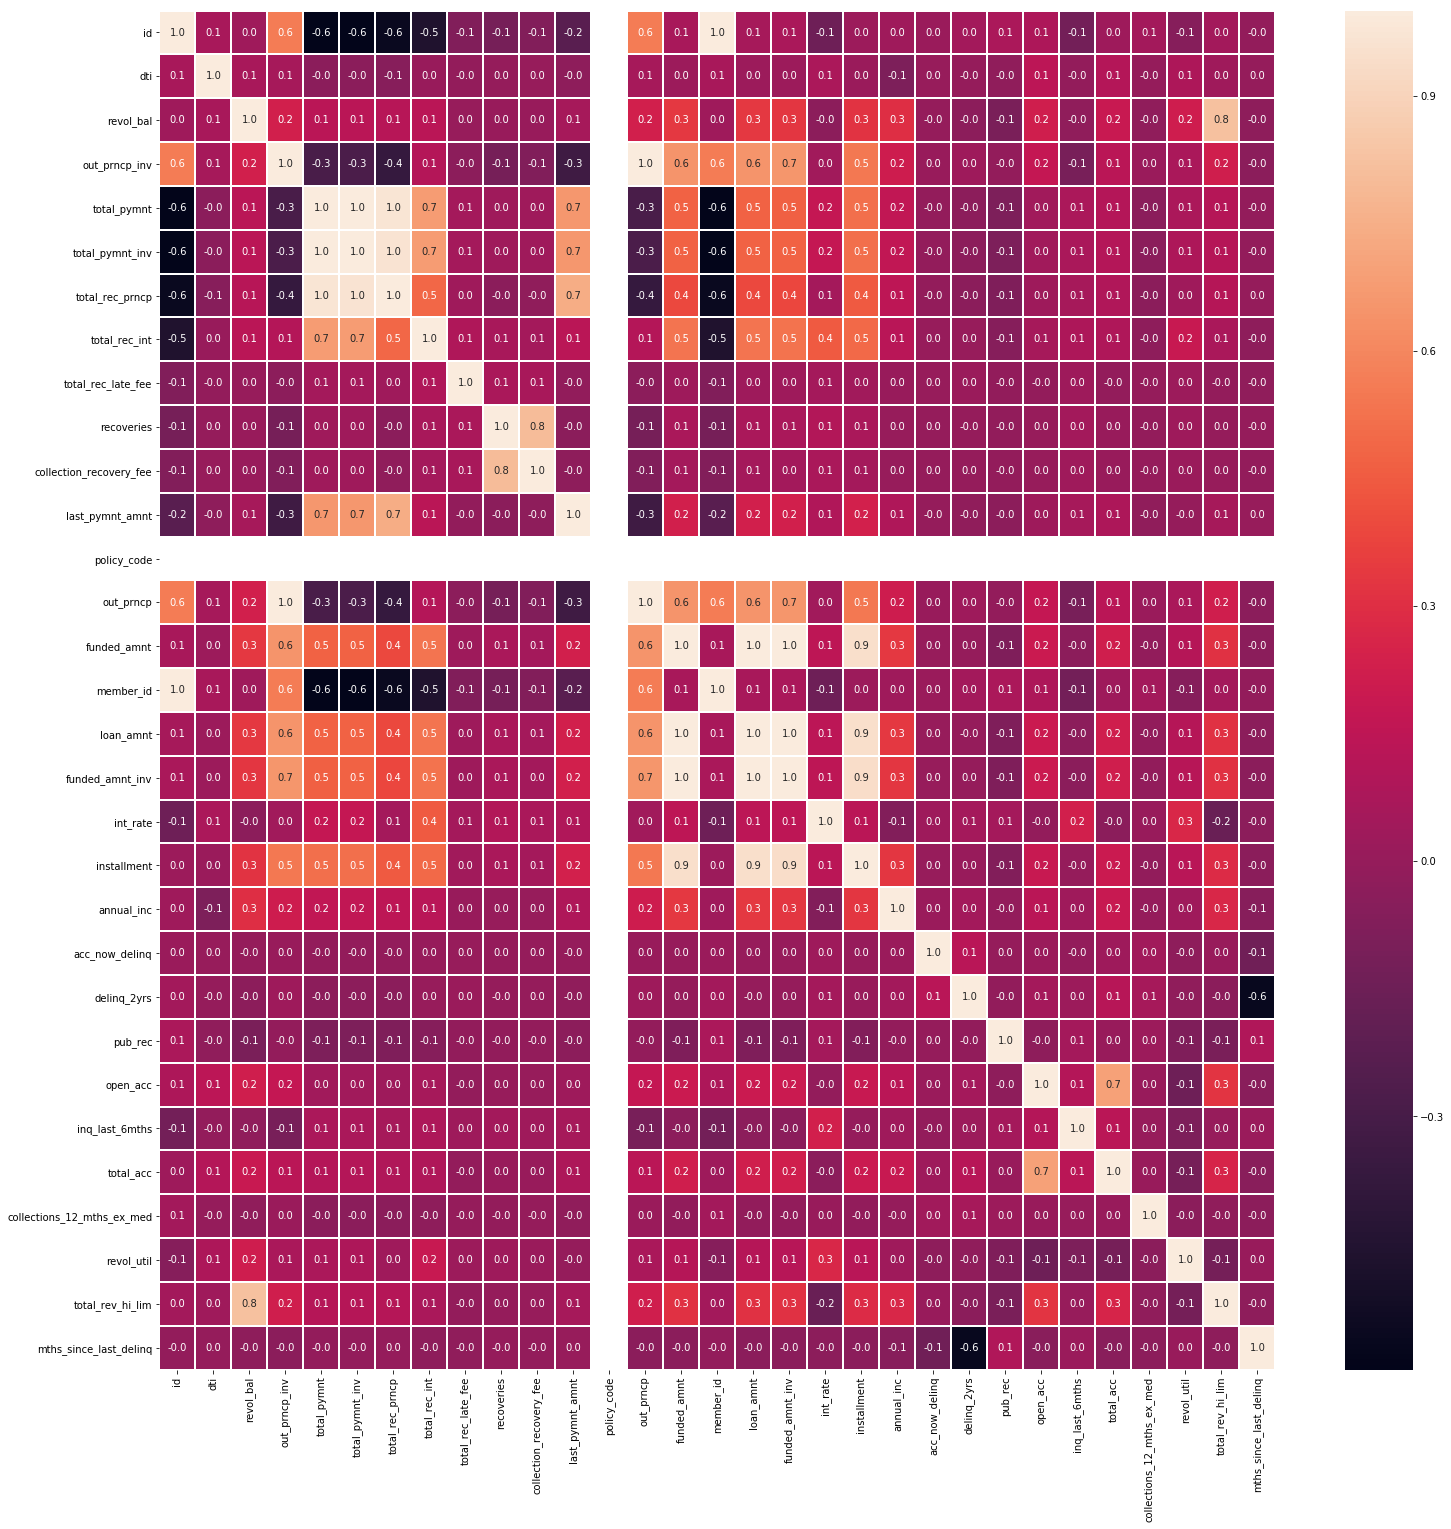

In [16]:
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(dataset_columns_with_data.corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()


<h4>Removing highly collinear features</h4>


In [17]:
highly_collinear_features=["total_pymnt_inv","total_rec_prncp","funded_amnt_inv","funded_amnt"]

In [18]:
dataset_columns_with_data.drop(columns=highly_collinear_features,inplace=True)

Removing non ordinal features

In [19]:
dataset_columns_with_data.drop(columns=["id"],inplace=True)

In [20]:
numerical_data = dataset_columns_with_data.select_dtypes(include = ['int64','float'])
categorical_data = dataset_columns_with_data.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values

In [21]:
print(len(numerical_features),len(categorical_features))

26 18


In [22]:
dataset_columns_with_data.corr()['int_rate'].sort_values(ascending=False)

int_rate                      1.000000
total_rec_int                 0.445767
revol_util                    0.269090
inq_last_6mths                0.227977
total_pymnt                   0.170555
loan_amnt                     0.145040
installment                   0.133064
recoveries                    0.106830
last_pymnt_amnt               0.101188
dti                           0.079950
collection_recovery_fee       0.070885
total_rec_late_fee            0.057131
delinq_2yrs                   0.055111
pub_rec                       0.052226
out_prncp                     0.042668
out_prncp_inv                 0.042525
acc_now_delinq                0.026480
collections_12_mths_ex_med    0.013360
open_acc                     -0.010047
mths_since_last_delinq       -0.030126
revol_bal                    -0.035604
total_acc                    -0.038554
annual_inc                   -0.072848
member_id                    -0.142296
total_rev_hi_lim             -0.166055
policy_code              

In [23]:
dataset_columns_with_data.isna().sum()

addr_state                         0
dti                                0
revol_bal                          0
initial_list_status                0
out_prncp_inv                      0
total_pymnt                        0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
policy_code                        0
application_type                   0
zip_code                           0
purpose                            0
out_prncp                          0
pymnt_plan                         0
member_id                          0
loan_status                        0
issue_d                            0
verification_status                0
loan_amnt                          0
url                                0
term                               0
int_rate                           0
installment                        0
grade                              0
s

In [24]:
#removing some more highly collinear features
dataset_columns_with_data.drop(columns=["total_rev_hi_lim","collection_recovery_fee","out_prncp_inv","total_acc","mths_since_last_delinq"],inplace=True)

In [25]:
dataset_columns_with_data.isna().sum()

addr_state                        0
dti                               0
revol_bal                         0
initial_list_status               0
total_pymnt                       0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
last_pymnt_amnt                   0
policy_code                       0
application_type                  0
zip_code                          0
purpose                           0
out_prncp                         0
pymnt_plan                        0
member_id                         0
loan_status                       0
issue_d                           0
verification_status               0
loan_amnt                         0
url                               0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
home_ownership                    0
annual_inc                  

In [26]:
#removing user filled data like title for the loan since we will know the purpose
dataset_columns_with_data.drop(columns=["title"],inplace=True)

In [27]:
dataset_columns_with_data["emp_length"]=dataset_columns_with_data["emp_length"].fillna(0)

In [28]:
dataset_columns_with_data.dropna(axis=0,subset=["last_credit_pull_d"],inplace=True)

In [29]:
numerical_data = dataset_columns_with_data.select_dtypes(include = ['int64','float'])
categorical_data = dataset_columns_with_data.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values

In [30]:
#checking if any data is left unhandled
dataset_columns_with_data.isna().sum()

addr_state                    0
dti                           0
revol_bal                     0
initial_list_status           0
total_pymnt                   0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
last_pymnt_amnt               0
policy_code                   0
application_type              0
zip_code                      0
purpose                       0
out_prncp                     0
pymnt_plan                    0
member_id                     0
loan_status                   0
issue_d                       0
verification_status           0
loan_amnt                     0
url                           0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
home_ownership                0
annual_inc                    0
acc_now_delinq                0
delinq_2yrs                   0
pub_rec                       0
open_acc

In [31]:
#generating clean data
dataset_columns_with_data.to_csv("../Data/dataclean.csv")

In [32]:
dataset_columns_with_data.shape

(886713, 38)

### Handling categorical data

In [33]:
categorical_features

array(['addr_state', 'initial_list_status', 'application_type',
       'zip_code', 'purpose', 'pymnt_plan', 'loan_status', 'issue_d',
       'verification_status', 'url', 'term', 'grade', 'sub_grade',
       'home_ownership', 'earliest_cr_line', 'last_credit_pull_d',
       'emp_length'], dtype=object)

In [34]:
numerical_features

array(['dti', 'revol_bal', 'total_pymnt', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'policy_code', 'out_prncp', 'member_id', 'loan_amnt', 'int_rate',
       'installment', 'annual_inc', 'acc_now_delinq', 'delinq_2yrs',
       'pub_rec', 'open_acc', 'inq_last_6mths',
       'collections_12_mths_ex_med', 'revol_util'], dtype=object)

In [35]:
dataset_columns_with_data[numerical_features].corr()['int_rate'].sort_values(ascending =False)

int_rate                      1.000000
total_rec_int                 0.445779
revol_util                    0.269078
inq_last_6mths                0.227997
total_pymnt                   0.170574
loan_amnt                     0.145056
installment                   0.133079
recoveries                    0.106831
last_pymnt_amnt               0.101195
dti                           0.079944
total_rec_late_fee            0.057132
delinq_2yrs                   0.055102
pub_rec                       0.052217
out_prncp                     0.042668
acc_now_delinq                0.026480
collections_12_mths_ex_med    0.013358
open_acc                     -0.010048
revol_bal                    -0.035604
annual_inc                   -0.072845
member_id                    -0.142316
policy_code                        NaN
Name: int_rate, dtype: float64

In [36]:
#removing installment as it is highly collinear with loan_amount
dataset_columns_with_data.drop(columns=["installment"],inplace=True)

In [37]:
#removing columns member id since it is non ordinal, policy_code as it does not have any correlation with interest rate
dataset_columns_with_data.drop(columns=["member_id","policy_code"],inplace=True)

In [38]:
numerical_data = dataset_columns_with_data.select_dtypes(include = ['int64','float'])
categorical_data = dataset_columns_with_data.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values

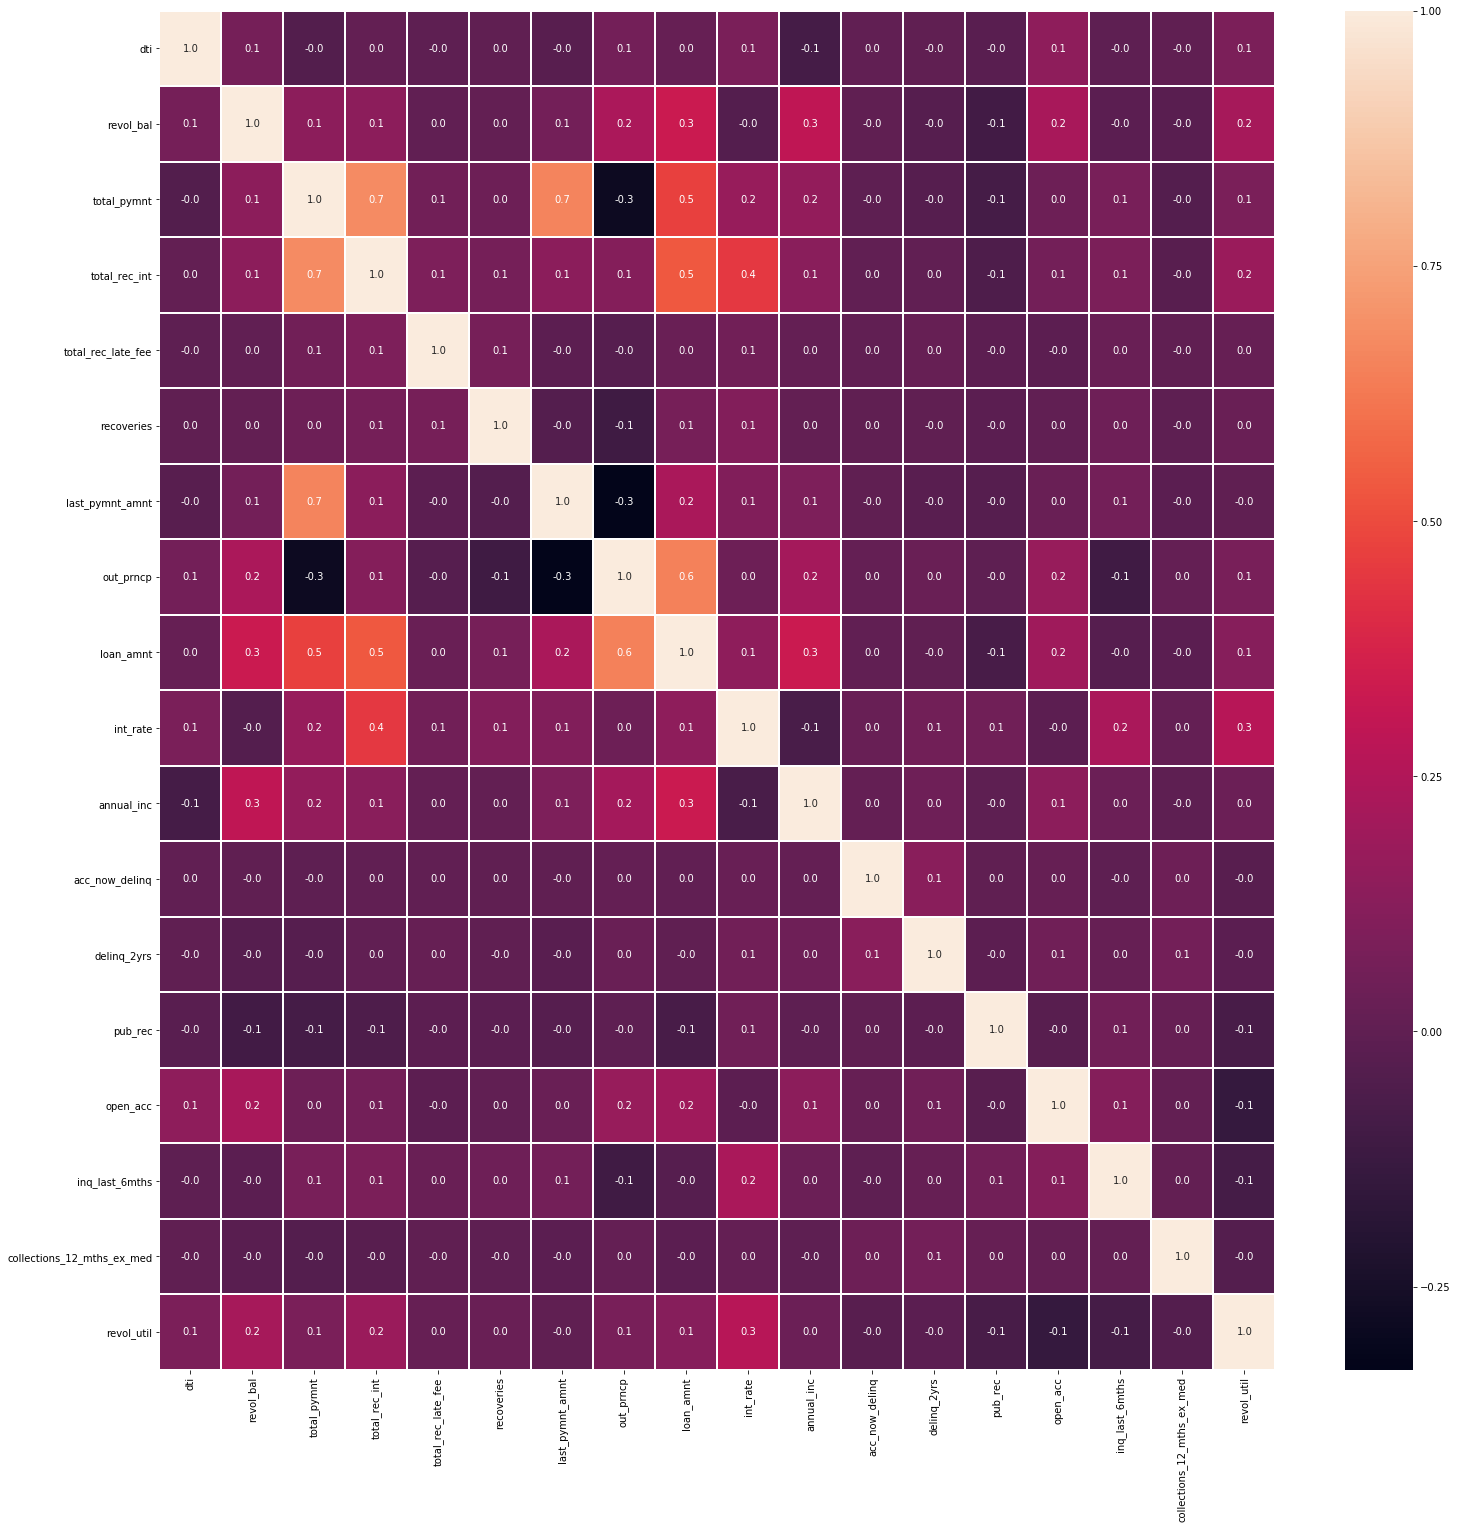

In [39]:
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(dataset_columns_with_data.corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

In [40]:
dataset_columns_with_data.corr()['int_rate'].sort_values(ascending=False)

int_rate                      1.000000
total_rec_int                 0.445779
revol_util                    0.269078
inq_last_6mths                0.227997
total_pymnt                   0.170574
loan_amnt                     0.145056
recoveries                    0.106831
last_pymnt_amnt               0.101195
dti                           0.079944
total_rec_late_fee            0.057132
delinq_2yrs                   0.055102
pub_rec                       0.052217
out_prncp                     0.042668
acc_now_delinq                0.026480
collections_12_mths_ex_med    0.013358
open_acc                     -0.010048
revol_bal                    -0.035604
annual_inc                   -0.072845
Name: int_rate, dtype: float64

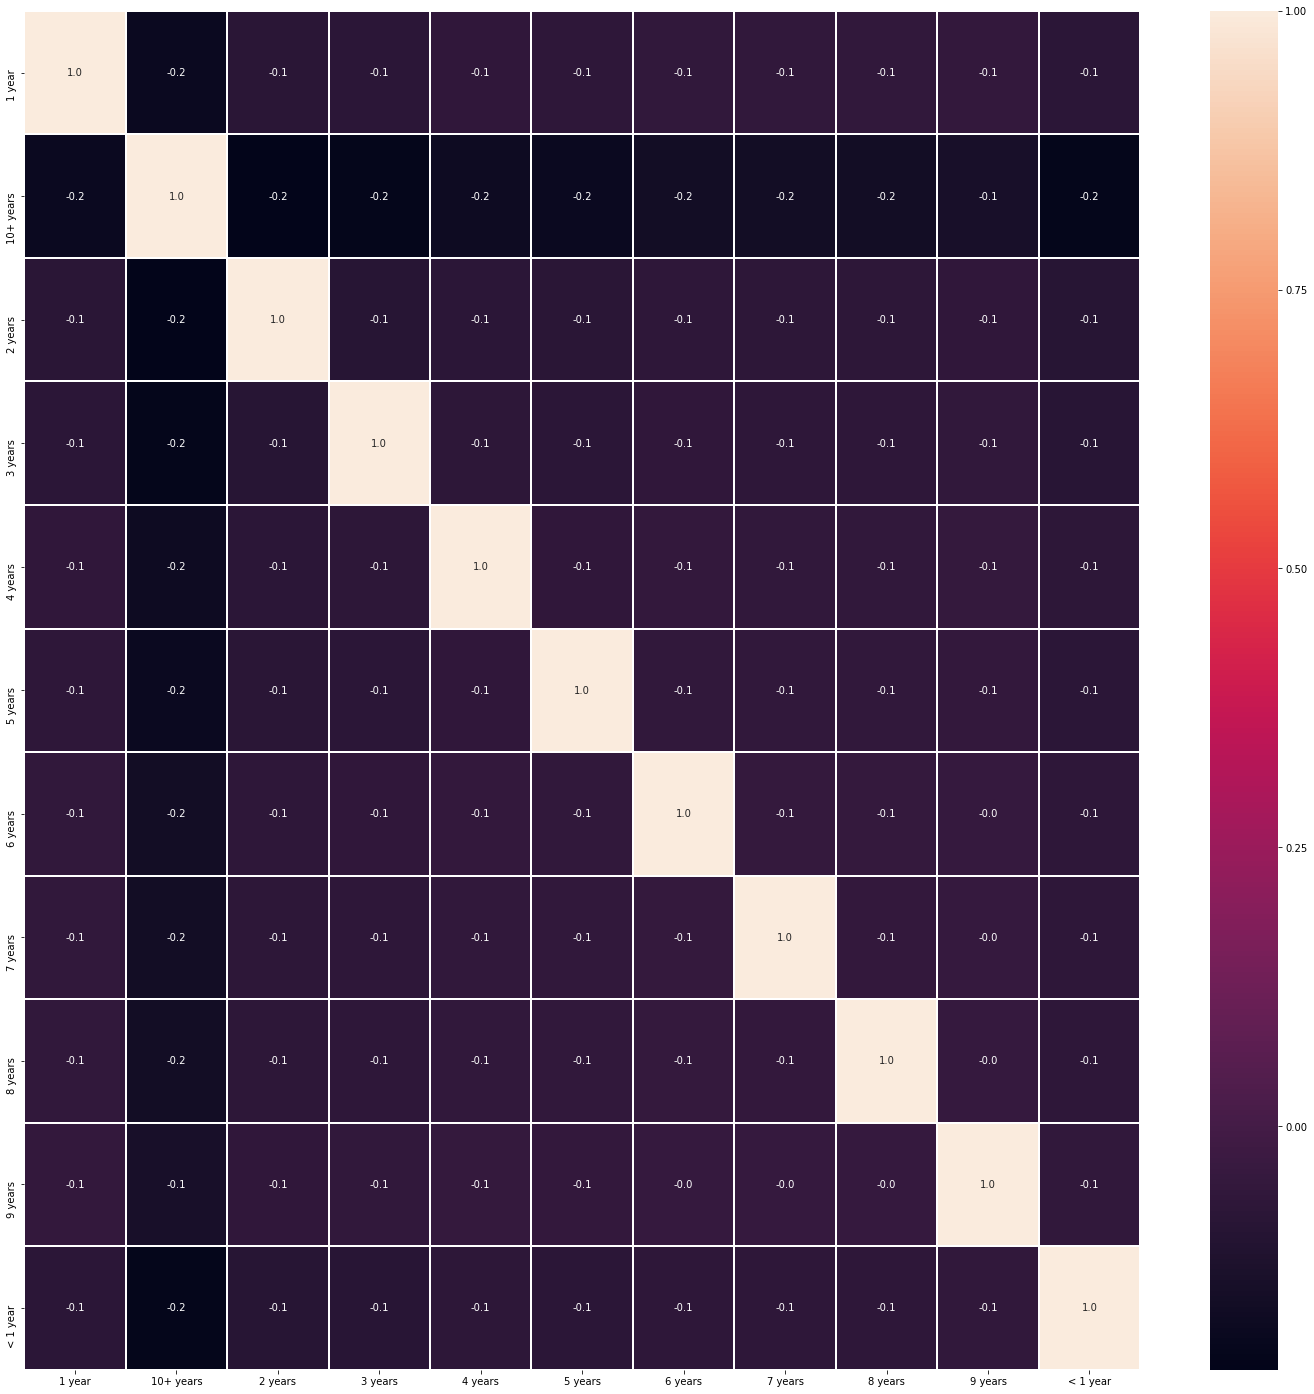

In [41]:
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(pd.get_dummies(dataset_columns_with_data["emp_length"],drop_first=True).corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()


In [42]:
len(numerical_features)
print(numerical_features)

['dti' 'revol_bal' 'total_pymnt' 'total_rec_int' 'total_rec_late_fee'
 'recoveries' 'last_pymnt_amnt' 'out_prncp' 'loan_amnt' 'int_rate'
 'annual_inc' 'acc_now_delinq' 'delinq_2yrs' 'pub_rec' 'open_acc'
 'inq_last_6mths' 'collections_12_mths_ex_med' 'revol_util']


In [43]:
len(categorical_features)
print(categorical_features)

['addr_state' 'initial_list_status' 'application_type' 'zip_code'
 'purpose' 'pymnt_plan' 'loan_status' 'issue_d' 'verification_status'
 'url' 'term' 'grade' 'sub_grade' 'home_ownership' 'earliest_cr_line'
 'last_credit_pull_d' 'emp_length']


<h3> Analyzing categorical Features </h3>

<ul>Ordinal Values
<li>grade</li>
<li>emp_length</li>
</ul>
<ul>Nominal Values
<li>home_ownership</li>
<li>verification_status</li>
<li>purpose</li>
<li>term</li>
<li>addr_state</li>
</ul>

In [44]:
# we will remove columns :URL,pymnt_plan, loan_status, zip_code - as these columns hold less significance in intrest rate calculation
dataset_columns_with_data.drop(columns =['url','zip_code','pymnt_plan'], inplace=True)

In [45]:
#we noticed that first row's values for both earliest_cr_line and last_credit_pull_d columns contain date values that would require a good amount of feature engineering for them to be potentially useful:
# earliest_cr_line — The month the borrower's earliest reported credit line was opened
# last_credit_pull_d — The most recent month Lending Club pulled credit for this loan
# We'll remove these date columns from the DataFrame.
dataset_columns_with_data.drop(columns =['initial_list_status','earliest_cr_line','last_credit_pull_d'], inplace=True)

In [46]:
numerical_data = dataset_columns_with_data.select_dtypes(include = ['int64','float'])
categorical_data = dataset_columns_with_data.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values

In [47]:
print(categorical_features)

['addr_state' 'application_type' 'purpose' 'loan_status' 'issue_d'
 'verification_status' 'term' 'grade' 'sub_grade' 'home_ownership'
 'emp_length']


In [48]:
sub_grades=[]
for key in dataset_columns_with_data.sub_grade.value_counts().to_dict().keys():
    sub_grades.append(key)
sub_grades=sorted(sub_grades)
grades=[]
for key in dataset_columns_with_data.grade.value_counts().to_dict().keys():
    grades.append(key)
grades=sorted(grades)

In [49]:
dataset_columns_with_data.reset_index(drop=True,inplace=True)

In [50]:
issued_dates = dataset_columns_with_data['issue_d']
dataset_columns_with_data.drop(columns=['issue_d'],inplace=True)

In [51]:
ordinal_features_map = {
   "emp_length": {
       "10+ years": 10,
       "9 years": 9,
       "8 years": 8,
       "7 years": 7,
       "6 years": 6,
       "5 years": 5,
       "4 years": 4,
       "3 years": 3,
       "2 years": 2,
       "1 year": 1,
       "< 1 year": 0,
       "n/a": 0

   },
   "grade":{
       "A": 1,
       "B": 2,
       "C": 3,
       "D": 4,
       "E": 5,
       "F": 6,
       "G": 7
   },
   "sub_grade":{
       'A1':1,
       'A2':2,
       'A3':3,
       'A4':4,
       'A5':5,
       'B1':6,
       'B2':7,
       'B3':8,
       'B4':9,
       'B5':10,
       'C1':11,
       'C2':12,
       'C3':13,
       'C4':14,
       'C5':15,
       'D1':16,
       'D2':17,
       'D3':18,
       'D4':19,
       'D5':20,
       'E1':21,
       'E2':22,
       'E3':23,
       'E4':24,
       'E5':25,
       'F1':26,
       'F2':27,
       'F3':28,
       'F4':29,
       'F5':30,
       'G1':31,
       'G2':32,
       'G3':33,
       'G4':34,
       'G5':35
   }
}
dataset_columns_with_data=dataset_columns_with_data.replace(ordinal_features_map)

In [52]:
numerical_data = dataset_columns_with_data.select_dtypes(include = ['int64','float'])
categorical_data = dataset_columns_with_data.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values
categorical_features=categorical_features.tolist()

In [53]:
categorical_features

['addr_state',
 'application_type',
 'purpose',
 'loan_status',
 'verification_status',
 'term',
 'home_ownership']

In [54]:
dataset_columns_with_data.reset_index(drop=True,inplace=True)

In [55]:
dataset_columns_with_data_copy=dataset_columns_with_data
print(len(dataset_columns_with_data_copy.columns.values),len(dataset_columns_with_data.columns.values))

28 28


In [56]:
def onehotencoder(dataset_columns_with_data,column):
    return dataset_columns_with_data.drop(columns=[column]).join(pd.get_dummies(dataset_columns_with_data[column],drop_first=True,prefix=column))
#replacing nominal categorical features with numeric data using one hot encoding technique
for feature in categorical_features:
    if feature != 'loan_status': #excluding Loan_status for future references
        dataset_columns_with_data = onehotencoder(dataset_columns_with_data,feature)

In [57]:
dataset_columns_with_data

,dti,revol_bal,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,out_prncp,loan_status,loan_amnt,...,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,27.65,13648.0,5861.071414,861.07,0.00,0.00,171.62,0.00,Fully Paid,5000.0,...,0,0,0,1,0,0,0,0,0,1
1,1.00,1687.0,1008.710000,435.17,0.00,117.08,119.66,0.00,Charged Off,2500.0,...,0,0,1,0,1,0,0,0,0,1
2,8.72,2956.0,3003.653644,603.65,0.00,0.00,649.91,0.00,Fully Paid,2400.0,...,0,0,0,0,0,0,0,0,0,1
3,20.00,5598.0,12226.302212,2209.33,16.97,0.00,357.48,0.00,Fully Paid,10000.0,...,0,0,1,0,0,0,0,0,0,1
4,17.94,27783.0,3242.170000,1009.07,0.00,0.00,67.79,766.90,Current,3000.0,...,0,0,1,0,1,0,0,0,0,1
5,11.20,7963.0,5631.377753,631.38,0.00,0.00,161.03,0.00,Fully Paid,5000.0,...,0,1,1,0,0,0,0,0,0,1
6,23.51,17726.0,8136.840000,3025.99,0.00,0.00,170.08,1889.15,Current,7000.0,...,0,0,0,0,1,0,0,0,0,1
7,5.35,8221.0,3938.144334,938.14,0.00,0.00,111.34,0.00,Fully Paid,3000.0,...,0,0,1,0,0,0,0,0,0,1
8,5.55,5210.0,646.020000,294.94,0.00,189.06,152.39,0.00,Charged Off,5600.0,...,0,0,1,0,1,0,0,0,1,0
9,18.08,9279.0,1476.190000,533.42,0.00,269.29,121.45,0.00,Charged Off,5375.0,...,0,0,0,1,1,0,0,0,0,1


<h4>verifying that all columns are numeric are not</h4>

In [58]:
numerical_data = dataset_columns_with_data.select_dtypes(include = ['int64','float','uint8'])
categorical_data = dataset_columns_with_data.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values

In [59]:
print(dataset_columns_with_data.dtypes.to_dict())

{'dti': dtype('float64'), 'revol_bal': dtype('float64'), 'total_pymnt': dtype('float64'), 'total_rec_int': dtype('float64'), 'total_rec_late_fee': dtype('float64'), 'recoveries': dtype('float64'), 'last_pymnt_amnt': dtype('float64'), 'out_prncp': dtype('float64'), 'loan_status': dtype('O'), 'loan_amnt': dtype('float64'), 'int_rate': dtype('float64'), 'grade': dtype('int64'), 'sub_grade': dtype('int64'), 'annual_inc': dtype('float64'), 'acc_now_delinq': dtype('float64'), 'delinq_2yrs': dtype('float64'), 'pub_rec': dtype('float64'), 'open_acc': dtype('float64'), 'inq_last_6mths': dtype('float64'), 'collections_12_mths_ex_med': dtype('float64'), 'revol_util': dtype('float64'), 'emp_length': dtype('int64'), 'addr_state_AL': dtype('uint8'), 'addr_state_AR': dtype('uint8'), 'addr_state_AZ': dtype('uint8'), 'addr_state_CA': dtype('uint8'), 'addr_state_CO': dtype('uint8'), 'addr_state_CT': dtype('uint8'), 'addr_state_DC': dtype('uint8'), 'addr_state_DE': dtype('uint8'), 'addr_state_FL': dtype(

In [60]:
#verifing all columns are numeric
print('Total number of features after handling categorical data: ',len(dataset_columns_with_data.columns.values))
print("No. of categorical features left:",len(categorical_features))
print("No. of Numerical features left:",len(numerical_features))

Total number of features after handling categorical data:  94
No. of categorical features left: 1
No. of Numerical features left: 93


In [61]:
# checking correlations with target column
dictfeatures=dataset_columns_with_data.corr()['int_rate'].sort_values(ascending=False).to_dict()

In [62]:
dictfeatures

{'int_rate': 1.0,
 'sub_grade': 0.9774138265585272,
 'grade': 0.9542282778301797,
 'total_rec_int': 0.44577944941724107,
 'term_ 60 months': 0.4281278597904553,
 'revol_util': 0.2690783050521046,
 'inq_last_6mths': 0.2279973418205078,
 'verification_status_Verified': 0.21123764547850013,
 'total_pymnt': 0.1705737745728128,
 'loan_amnt': 0.14505555856281035,
 'recoveries': 0.10683142455710799,
 'last_pymnt_amnt': 0.10119466653787286,
 'purpose_debt_consolidation': 0.09736513310599197,
 'purpose_other': 0.09130628950453423,
 'dti': 0.07994412136514223,
 'purpose_small_business': 0.07419330038931472,
 'home_ownership_RENT': 0.061560544983168625,
 'total_rec_late_fee': 0.05713169964608411,
 'delinq_2yrs': 0.05510224806203673,
 'pub_rec': 0.052216576190761574,
 'purpose_moving': 0.04441230833395592,
 'out_prncp': 0.04266835819687199,
 'purpose_house': 0.04087411730115664,
 'purpose_medical': 0.0294743516963035,
 'acc_now_delinq': 0.02647986349882553,
 'purpose_vacation': 0.01822399466394524

In [63]:
final_clean_numeric_features=pd.DataFrame({"correlation with int_rate":dictfeatures})

In [64]:
final_clean_numeric_features.index.name="Feature name"

In [65]:
final_clean_numeric_features.to_csv('../Data/final_clean_numeric_features.csv')

In [66]:
dataset_columns_with_data.reset_index(drop=True).join(issued_dates).to_csv('../Data/dataset_columns_with_data_handled.csv')

In [67]:
dataset_columns_with_data

,dti,revol_bal,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,out_prncp,loan_status,loan_amnt,...,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,27.65,13648.0,5861.071414,861.07,0.00,0.00,171.62,0.00,Fully Paid,5000.0,...,0,0,0,1,0,0,0,0,0,1
1,1.00,1687.0,1008.710000,435.17,0.00,117.08,119.66,0.00,Charged Off,2500.0,...,0,0,1,0,1,0,0,0,0,1
2,8.72,2956.0,3003.653644,603.65,0.00,0.00,649.91,0.00,Fully Paid,2400.0,...,0,0,0,0,0,0,0,0,0,1
3,20.00,5598.0,12226.302212,2209.33,16.97,0.00,357.48,0.00,Fully Paid,10000.0,...,0,0,1,0,0,0,0,0,0,1
4,17.94,27783.0,3242.170000,1009.07,0.00,0.00,67.79,766.90,Current,3000.0,...,0,0,1,0,1,0,0,0,0,1
5,11.20,7963.0,5631.377753,631.38,0.00,0.00,161.03,0.00,Fully Paid,5000.0,...,0,1,1,0,0,0,0,0,0,1
6,23.51,17726.0,8136.840000,3025.99,0.00,0.00,170.08,1889.15,Current,7000.0,...,0,0,0,0,1,0,0,0,0,1
7,5.35,8221.0,3938.144334,938.14,0.00,0.00,111.34,0.00,Fully Paid,3000.0,...,0,0,1,0,0,0,0,0,0,1
8,5.55,5210.0,646.020000,294.94,0.00,189.06,152.39,0.00,Charged Off,5600.0,...,0,0,1,0,1,0,0,0,1,0
9,18.08,9279.0,1476.190000,533.42,0.00,269.29,121.45,0.00,Charged Off,5375.0,...,0,0,0,1,1,0,0,0,0,1


## Risk Averse Criteria set by Rick the Risk Averse Investor

#### Rick is one of the investor who do not want to take risk while investing in the lending club. So we have provided him the dataset that we have cleaned and with the features that are highly important in deciding the interest rate.

#### He studies the dataset and comes up with some condition on the features based on which he can invest his money.

#### 1. Grades - We already provided the numeric interpretation of the grades and sub-grades

##### He would be interested in investing to those type which is in top 50% i.e A,B,C and upper half of D i.e D1-D3.

#### 2. Verification Status - Rick would be investing only if the borrower is a verified borrower as he is not willing to take any risk. He doesn't mind if the interest rate is low because he is focussing more on the getting back the invested money.

#### 3. Annual Income - Rick would be investing if loan to annual income ratio is less than 30% - To see the trend, how interest rate varies with the ratio, we have done data analysis



In [69]:
# Removing records according to grades above 4, sub_grades above 18, and verifiication status

dataset_columns_with_data.drop(dataset_columns_with_data[dataset_columns_with_data.grade > 4].index, inplace=True)
dataset_columns_with_data.drop(dataset_columns_with_data[dataset_columns_with_data.sub_grade > 18].index, inplace=True)
dataset_columns_with_data.drop(dataset_columns_with_data[dataset_columns_with_data.verification_status_Verified ==0].index, inplace=True)

In [70]:
dataset_columns_with_data

,dti,revol_bal,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,out_prncp,loan_status,loan_amnt,...,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,27.65,13648.0,5861.071414,861.07,0.0,0.00,171.62,0.00,Fully Paid,5000.0,...,0,0,0,1,0,0,0,0,0,1
9,18.08,9279.0,1476.190000,533.42,0.0,269.29,121.45,0.00,Charged Off,5375.0,...,0,0,0,1,1,0,0,0,0,1
18,18.44,0.0,7164.499852,1149.50,15.0,0.00,16.98,0.00,Fully Paid,6000.0,...,0,0,0,1,0,1,0,0,0,0
20,26.53,17813.0,27663.042671,7413.04,0.0,0.00,6024.09,0.00,Fully Paid,20250.0,...,0,0,0,1,1,0,0,0,0,1
21,13.22,32135.0,14025.400000,3330.44,0.0,0.00,701.73,0.00,Charged Off,21000.0,...,0,0,0,1,0,0,0,0,0,1
25,29.44,13707.0,15823.480000,823.48,0.0,0.00,2447.05,0.00,Fully Paid,15000.0,...,0,0,0,1,0,1,0,0,0,0
31,14.03,23151.0,34886.080000,3061.08,0.0,0.00,16966.70,0.00,Fully Paid,31825.0,...,0,0,0,1,0,1,0,0,0,0
32,22.83,16158.0,11622.360000,4317.69,0.0,0.00,242.97,2695.31,Current,10000.0,...,0,0,0,1,1,0,0,0,0,1
33,11.93,2224.0,5714.592129,714.59,0.0,0.00,163.64,0.00,Fully Paid,5000.0,...,0,0,0,1,0,0,0,0,0,1
37,8.48,6704.0,16662.600000,1662.60,0.0,0.00,5872.80,0.00,Fully Paid,15000.0,...,0,0,0,1,0,0,0,0,0,1


In [71]:
dataset_columns_with_data['loan_income_ratio']= (dataset_columns_with_data['loan_amnt']/dataset_columns_with_data['annual_inc'])*100

In [72]:
dataset = dataset_columns_with_data

##### Distribution of loan_income_ratio in each int_rate to check all scenarios are fulfilled for model in both buckets(<30, >30)

Text(0.5, 0, 'int_rate')

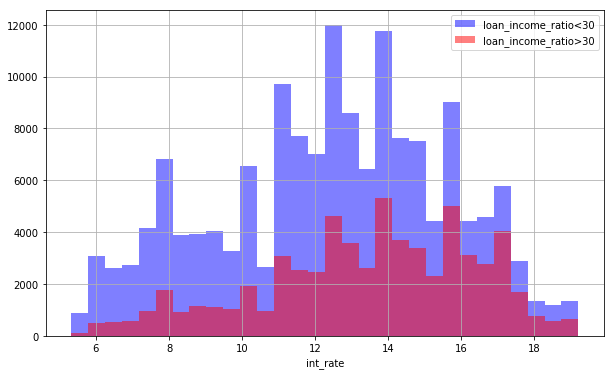

In [73]:
plt.figure(figsize=(10,6))
dataset[dataset['loan_income_ratio']<=30]['int_rate'].hist(alpha=0.5,color='blue',
                                              bins=30,label='loan_income_ratio<30')
dataset[dataset['loan_income_ratio']> 30]['int_rate'].hist(alpha=0.5,color='red',
                                              bins=30,label='loan_income_ratio>30')
plt.legend()
plt.xlabel('int_rate')

C:\Users\navee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


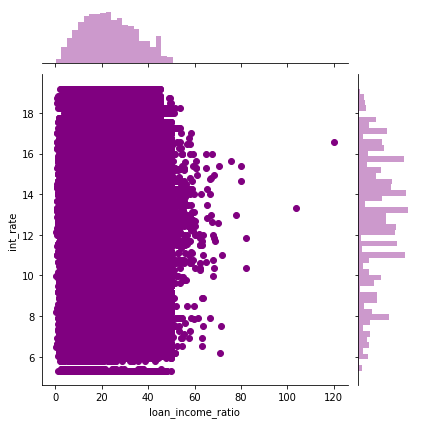

In [74]:
sns.jointplot(x='loan_income_ratio',y='int_rate',data=dataset,color='purple')

In [75]:
# Removing records with loan_income_ratio >30%
dataset.drop(dataset[dataset.loan_income_ratio > 30].index, inplace=True)

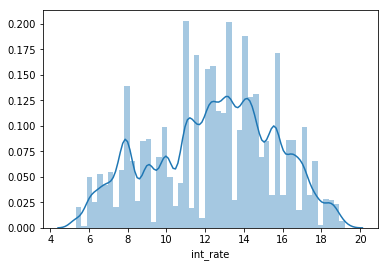

In [76]:
#checking distribution of interest rates
sns.distplot(dataset['int_rate'])

C:\Users\navee\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


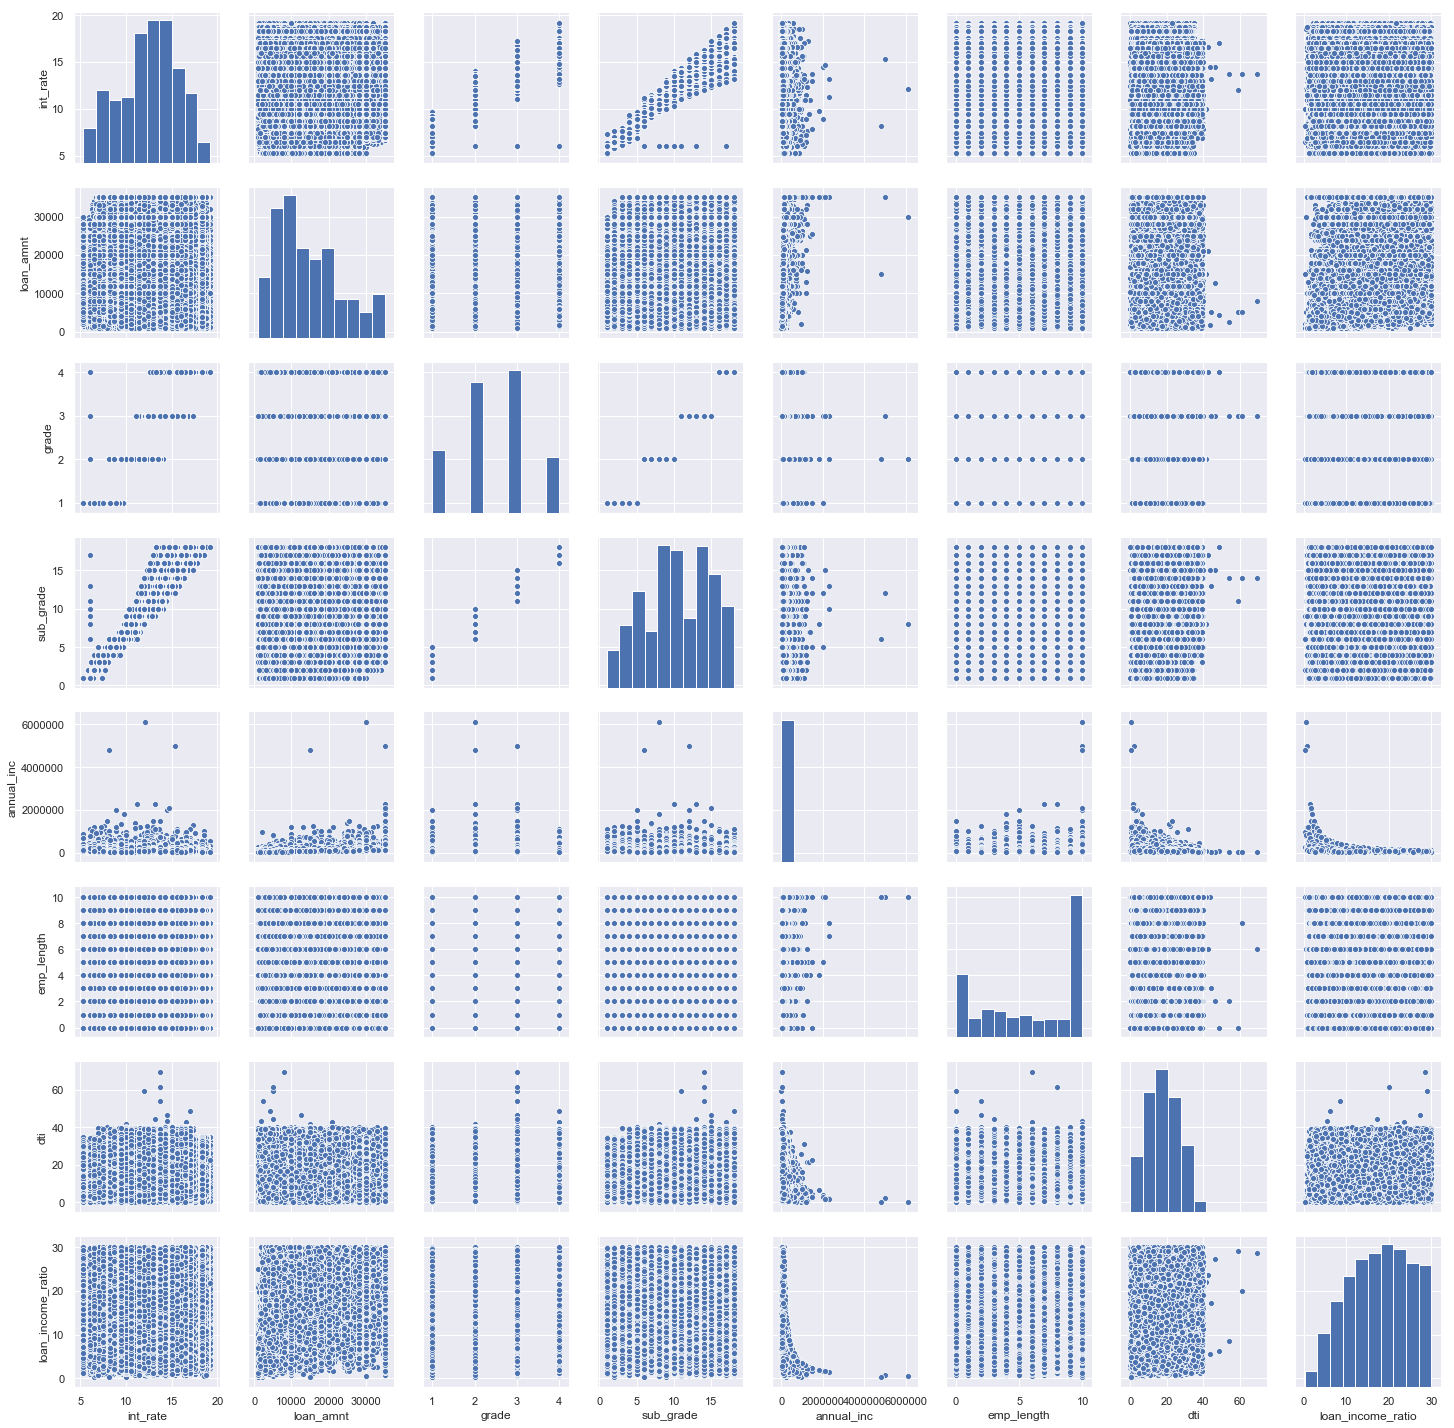

In [77]:
#scatterplot
sns.set()
cols = ['int_rate', 'loan_amnt','grade', 'sub_grade', 'annual_inc', 'emp_length', 'dti', 'loan_income_ratio']
sns.pairplot(dataset[cols], size = 2.5)
plt.show();

In [81]:
# dropping few columns as they have no importance on building model for interest rate

# total_rec_int - Interest received to date - Interest amount recieved is volatile and changes with repayment amount
# total_rec_late_fee - Late fees received to date
# recoveries - post charge off gross recovery
# last_pymnt_amnt - last recorded payed amount
# out_prncp - Remaining outstanding principal for total amount funded - It changes every time a payment is recorded
# grade - We consider sub-grade for modeling so it can be removed
# collections_12_mths_ex_med - Number of collections in 12 months excluding medical collections - records number of collection in a year
# verification_status - Only verified status is considered so can be removed
# 'Verified','Source Verified' - generated when categorical is changed to numeric for the verification status

unwanted_variables = ['total_rec_int', 'total_rec_late_fee','recoveries','last_pymnt_amnt','out_prncp',
                      'grade','collections_12_mths_ex_med','verification_status_Verified','verification_status_Source Verified']
for variable in unwanted_variables:
    dataset.drop([variable], axis=1, inplace=True)

In [82]:
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(dataset)

,dti,revol_bal,total_pymnt,loan_status,loan_amnt,int_rate,sub_grade,annual_inc,acc_now_delinq,delinq_2yrs,pub_rec,open_acc,inq_last_6mths,revol_util,emp_length,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,application_type_JOINT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_income_ratio
0,27.65,13648.0,5861.071414,Fully Paid,5000.0,10.65,7,24000.0,0.0,0.0,0.0,3.0,1.0,83.70,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20.833333
18,18.44,0.0,7164.499852,Fully Paid,6000.0,11.71,8,84000.0,0.0,2.0,0.0,4.0,0.0,37.73,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,7.142857
21,13.22,32135.0,14025.400000,Charged Off,21000.0,12.42,9,105000.0,0.0,0.0,0.0,7.0,0.0,90.30,10,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20.000000
25,29.44,13707.0,15823.480000,Fully Paid,15000.0,9.91,6,92000.0,0.0,0.0,0.0,8.0,0.0,93.90,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,16.304348
33,11.93,2224.0,5714.592129,Fully Paid,5000.0,8.90,5,24044.0,0.0,0.0,0.0,8.0,0.0,29.30,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20.795209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886701,33.66,10529.0,3670.190000,Current,10000.0,6.49,2,75000.0,0.0,0.0,0.0,9.0,0.0,34.70,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13.333333
886703,12.63,1700.0,4158.020000,Fully Paid,4000.0,8.67,6,50000.0,0.0,0.0,1.0,11.0,0.0,5.60,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8.000000
886704,25.63,6361.0,2874.730000,Current,7500.0,9.49,7,40000.0,0.0,0.0,1.0,10.0,0.0,43.90,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,18.750000
886706,23.69,21110.0,4766.250000,Current,12000.0,11.99,10,63000.0,0.0,1.0,0.0,13.0,0.0,69.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,19.047619


In [84]:
dataset.to_csv('../Data/finaldataset.csv')